IMPORTING LIBRARIES

In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore

from datetime import date
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings
warnings.filterwarnings('ignore')


There are Two Data files. The first one is Wage Price Index. It measures the changes in the price of labour hours worked or employee characteristics

In [36]:
df2 = pd.read_excel('WPI.xlsx')
df2.head()

,Quarter,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,1997-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-12-01,0.6,0.7,0.9,0.7,0.9,0.4,1.2,0.1,0.9
2,1998-03-01,1.0,0.9,0.7,0.6,1.1,0.7,0.6,0.9,0.7
3,1998-06-01,0.4,0.4,0.4,0.4,0.6,0.3,0.4,0.4,0.6
4,1998-09-01,1.5,1.2,1.2,1.3,0.8,1.0,0.9,1.3,1.0


The second one is Labour Force. The data is about the estimates of employment participation and hours worked from the Labour Force Survey

In [37]:
df = pd.read_excel('LFI.xlsx')
df.head()

,Month,Sex,Age,State and territory (STT): ASGS (2011),Persons - current month ('000)
0,2003-05-01,Males,15-19 years,New South Wales,33.877554
1,2003-05-01,Males,15-19 years,Victoria,18.009177
2,2003-05-01,Males,15-19 years,Queensland,21.184848
3,2003-05-01,Males,15-19 years,South Australia,8.384322
4,2003-05-01,Males,15-19 years,Western Australia,10.889558


To ensure consistency between the two data files, it is crucial to transform the labour force data into a format that aligns with the wage price index data. The provided code snippet will facilitate this conversion process, making the labour force data consistent with the desired format of the wage price index data.

In [39]:
# Renaming specific columns in the DataFrame
df.rename(columns={
    'Month': 'Quarter',
    'State and territory (STT): ASGS (2011)': 'State & Territory',
    "Persons - current month ('000)": 'Change'
}, inplace=True)

To match the quarterly availability of the Wage Price Index (WPI) data, the Labor Force (LF) data has been modified to include data for every quarter instead of on a monthly basis. This adjustment ensures that both datasets have a consistent time granularity, allowing for meaningful comparisons and analysis.

In [40]:
# Convert the 'Quarter' column to datetime format
df['Quarter'] = pd.to_datetime(df['Quarter'])

# Extract the month from the 'date' column
df['month'] = df['Quarter'].dt.month

# Filter the DataFrame for months 03, 06, 09, and 12
df = df[df['month'].isin([3, 6, 9, 12])]

# Optional: If you want to remove the 'month' column from the filtered DataFrame
df = df.drop('month', axis=1)

In [41]:
df.head()

,Quarter,Sex,Age,State & Territory,Change
174,2003-06-01,Males,15-19 years,New South Wales,30.632593
175,2003-06-01,Males,15-19 years,Victoria,19.570115
176,2003-06-01,Males,15-19 years,Queensland,21.970824
177,2003-06-01,Males,15-19 years,South Australia,6.975500
178,2003-06-01,Males,15-19 years,Western Australia,10.887448


This code splits the original DataFrame by states, calculate the average of columns for each state, and then join the resulting dataframes into a final dataframe.

In [42]:
# Split the DataFrame by states
state_dfs = []
for state in df['State & Territory'].unique():
    state_df = df[df['State & Territory'] == state].copy()
    state_dfs.append(state_df)

# Average the columns for ages
averaged_dfs = []
for state_df in state_dfs:
    averaged_df = state_df.groupby(['Quarter', 'State & Territory']).mean().reset_index()
    averaged_dfs.append(averaged_df)

# Join the dataframes
final_df = pd.concat(averaged_dfs)

# Optional: Reset the index of the final DataFrame
final_df.reset_index(drop=True, inplace=True)

In [43]:
final_df

,Quarter,State & Territory,Change
0,2003-06-01,New South Wales,77.251839
1,2003-09-01,New South Wales,78.046859
2,2003-12-01,New South Wales,78.592962
3,2004-03-01,New South Wales,78.313855
4,2004-06-01,New South Wales,76.087651
...,...,...,...
635,2022-03-01,Australian Capital Territory,6.443118
636,2022-06-01,Australian Capital Territory,6.457763
637,2022-09-01,Australian Capital Territory,6.738617
638,2022-12-01,Australian Capital Territory,7.221381


To create the final dataframe that aligns with the Wage Price Index (WPI), the table has been pivoted to transform the states and territories into individual columns. This pivot operation restructures the data, making it easier to compare and analyze the variables across different regions.

In [44]:
pivot_df = final_df.pivot_table(index='Quarter', columns='State & Territory', values='Change').reset_index()

In [45]:
pivot_df.head()

State & Territory,Quarter,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
0,2003-06-01,4.456409,77.251839,2.140353,43.192609,17.643094,4.954132,57.596949,23.622356
1,2003-09-01,4.495341,78.046859,2.224889,43.355746,17.369845,5.082873,58.003640,22.679724
2,2003-12-01,4.526161,78.592962,2.316316,43.648396,17.330640,5.132662,58.360395,23.667742
3,2004-03-01,4.620433,78.313855,2.269114,44.346304,17.148689,5.106435,59.014260,23.109926
4,2004-06-01,4.493003,76.087651,2.490253,43.505065,16.757549,4.993328,58.935086,23.834506


In [46]:
pivot_df.head()

State & Territory,Quarter,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
0,2003-06-01,4.456409,77.251839,2.140353,43.192609,17.643094,4.954132,57.596949,23.622356
1,2003-09-01,4.495341,78.046859,2.224889,43.355746,17.369845,5.082873,58.003640,22.679724
2,2003-12-01,4.526161,78.592962,2.316316,43.648396,17.330640,5.132662,58.360395,23.667742
3,2004-03-01,4.620433,78.313855,2.269114,44.346304,17.148689,5.106435,59.014260,23.109926
4,2004-06-01,4.493003,76.087651,2.490253,43.505065,16.757549,4.993328,58.935086,23.834506


In [47]:
# Define the desired order of columns according to WPI data
desired_order = [
    'Quarter',
    'New South Wales',
    'Victoria',
    'Queensland',
    'South Australia',
    'Western Australia',
    'Tasmania',
    'Northern Territory',
    'Australian Capital Territory',
]

In [48]:
pivot_df = pivot_df.reindex(columns=desired_order)

In [49]:
pivot_df.head()


State & Territory,Quarter,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,2003-06-01,77.251839,57.596949,43.192609,17.643094,23.622356,4.954132,2.140353,4.456409
1,2003-09-01,78.046859,58.003640,43.355746,17.369845,22.679724,5.082873,2.224889,4.495341
2,2003-12-01,78.592962,58.360395,43.648396,17.330640,23.667742,5.132662,2.316316,4.526161
3,2004-03-01,78.313855,59.014260,44.346304,17.148689,23.109926,5.106435,2.269114,4.620433
4,2004-06-01,76.087651,58.935086,43.505065,16.757549,23.834506,4.993328,2.490253,4.493003


In [50]:
# Calculate the mean across columns (excluding 'Quarter') and assign it to the 'Australia' column
pivot_df['Australia'] = pivot_df.drop('Quarter', axis=1).mean(axis=1)

In [51]:
pivot_df.head()

State & Territory,Quarter,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,2003-06-01,77.251839,57.596949,43.192609,17.643094,23.622356,4.954132,2.140353,4.456409,28.857218
1,2003-09-01,78.046859,58.003640,43.355746,17.369845,22.679724,5.082873,2.224889,4.495341,28.907365
2,2003-12-01,78.592962,58.360395,43.648396,17.330640,23.667742,5.132662,2.316316,4.526161,29.196909
3,2004-03-01,78.313855,59.014260,44.346304,17.148689,23.109926,5.106435,2.269114,4.620433,29.241127
4,2004-06-01,76.087651,58.935086,43.505065,16.757549,23.834506,4.993328,2.490253,4.493003,28.887055


In [52]:
# Convert the 'Quarter' column to datetime format
df['Quarter'] = pd.to_datetime(df['Quarter'])

In [53]:
# Filter the WPI DataFrame to keep data from 2003-06-01 onwards
df2 = df2[df2['Quarter'] >= '2003-06-01']

In [54]:
df2.head()

,Quarter,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
23,2003-06-01,0.5,0.6,0.5,0.5,0.5,0.8,0.3,0.3,0.5
24,2003-09-01,1.4,1.2,1.1,1.6,1.2,1.3,1.0,2.0,1.2
25,2003-12-01,0.9,0.7,1.1,1.2,0.8,0.9,1.1,1.1,1.0
26,2004-03-01,0.8,0.6,1.0,0.6,0.5,0.5,0.9,0.7,0.7
27,2004-06-01,0.6,0.7,0.5,0.2,0.5,0.5,0.6,0.2,0.5


In [55]:
df2.reset_index(drop=True)

,Quarter,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory,Australia
0,2003-06-01,0.5,0.6,0.5,0.5,0.5,0.8,0.3,0.3,0.5
1,2003-09-01,1.4,1.2,1.1,1.6,1.2,1.3,1.0,2.0,1.2
2,2003-12-01,0.9,0.7,1.1,1.2,0.8,0.9,1.1,1.1,1.0
3,2004-03-01,0.8,0.6,1.0,0.6,0.5,0.5,0.9,0.7,0.7
4,2004-06-01,0.6,0.7,0.5,0.2,0.5,0.5,0.6,0.2,0.5
...,...,...,...,...,...,...,...,...,...,...
75,2022-03-01,0.6,0.6,0.5,0.6,0.5,0.6,0.3,0.5,0.6
76,2022-06-01,0.5,0.6,0.7,0.4,0.8,0.6,0.3,0.4,0.6
77,2022-09-01,1.4,1.4,1.4,1.8,1.4,1.7,1.4,1.2,1.4
78,2022-12-01,0.8,0.8,0.8,0.7,0.8,0.6,0.6,0.9,0.8


By renaming the columns with specific suffixes, the code facilitates the subsequent join operation, ensuring that the columns from both DataFrames can be uniquely identified and distinguished in the resulting merged table.

In [56]:
#Renaming columns in the two dataframes
pivot_df.rename(columns=lambda x: x + '_lf' if x != 'Quarter' else x, inplace=True)
df2.rename(columns=lambda x: x + '_wpi' if x != 'Quarter' else x, inplace=True)

In [57]:
pivot_df.head()

State & Territory,Quarter,New South Wales_lf,Victoria_lf,Queensland_lf,South Australia_lf,Western Australia_lf,Tasmania_lf,Northern Territory_lf,Australian Capital Territory_lf,Australia_lf
0,2003-06-01,77.251839,57.596949,43.192609,17.643094,23.622356,4.954132,2.140353,4.456409,28.857218
1,2003-09-01,78.046859,58.003640,43.355746,17.369845,22.679724,5.082873,2.224889,4.495341,28.907365
2,2003-12-01,78.592962,58.360395,43.648396,17.330640,23.667742,5.132662,2.316316,4.526161,29.196909
3,2004-03-01,78.313855,59.014260,44.346304,17.148689,23.109926,5.106435,2.269114,4.620433,29.241127
4,2004-06-01,76.087651,58.935086,43.505065,16.757549,23.834506,4.993328,2.490253,4.493003,28.887055


In [58]:
final_df = df2.merge(pivot_df, on='Quarter')

In [59]:
final_df.head()

,Quarter,New South Wales_wpi,Victoria_wpi,Queensland_wpi,South Australia_wpi,Western Australia_wpi,Tasmania _wpi,Northern Territory_wpi,Australian Capital Territory_wpi,Australia_wpi,New South Wales_lf,Victoria_lf,Queensland_lf,South Australia_lf,Western Australia_lf,Tasmania_lf,Northern Territory_lf,Australian Capital Territory_lf,Australia_lf
0,2003-06-01,0.5,0.6,0.5,0.5,0.5,0.8,0.3,0.3,0.5,77.251839,57.596949,43.192609,17.643094,23.622356,4.954132,2.140353,4.456409,28.857218
1,2003-09-01,1.4,1.2,1.1,1.6,1.2,1.3,1.0,2.0,1.2,78.046859,58.003640,43.355746,17.369845,22.679724,5.082873,2.224889,4.495341,28.907365
2,2003-12-01,0.9,0.7,1.1,1.2,0.8,0.9,1.1,1.1,1.0,78.592962,58.360395,43.648396,17.330640,23.667742,5.132662,2.316316,4.526161,29.196909
3,2004-03-01,0.8,0.6,1.0,0.6,0.5,0.5,0.9,0.7,0.7,78.313855,59.014260,44.346304,17.148689,23.109926,5.106435,2.269114,4.620433,29.241127
4,2004-06-01,0.6,0.7,0.5,0.2,0.5,0.5,0.6,0.2,0.5,76.087651,58.935086,43.505065,16.757549,23.834506,4.993328,2.490253,4.493003,28.887055


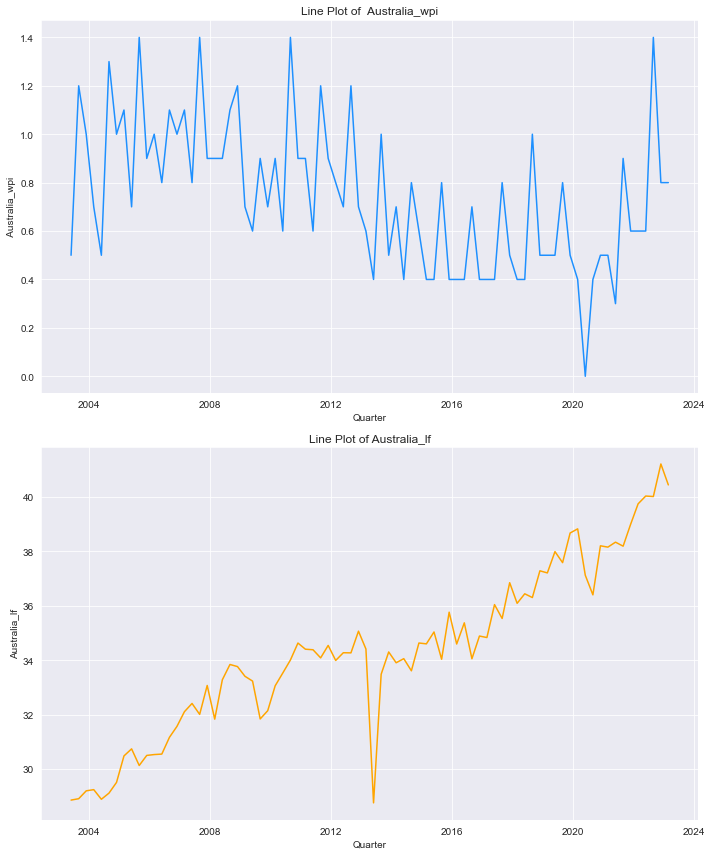

In [60]:
# Specify the columns you want to visualize
column1 = ' Australia_wpi'
column2 = 'Australia_lf'

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot for column1
sns.lineplot(data=final_df, x='Quarter', y=column1, ax=ax1, color='dodgerblue')
ax1.set_title('Line Plot of {}'.format(column1))
ax1.set_xlabel('Quarter')
ax1.set_ylabel(column1)

# Plot for column2
sns.lineplot(data=final_df, x='Quarter', y=column2, ax=ax2, color='orange')
ax2.set_title('Line Plot of {}'.format(column2))
ax2.set_xlabel('Quarter')
ax2.set_ylabel(column2)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

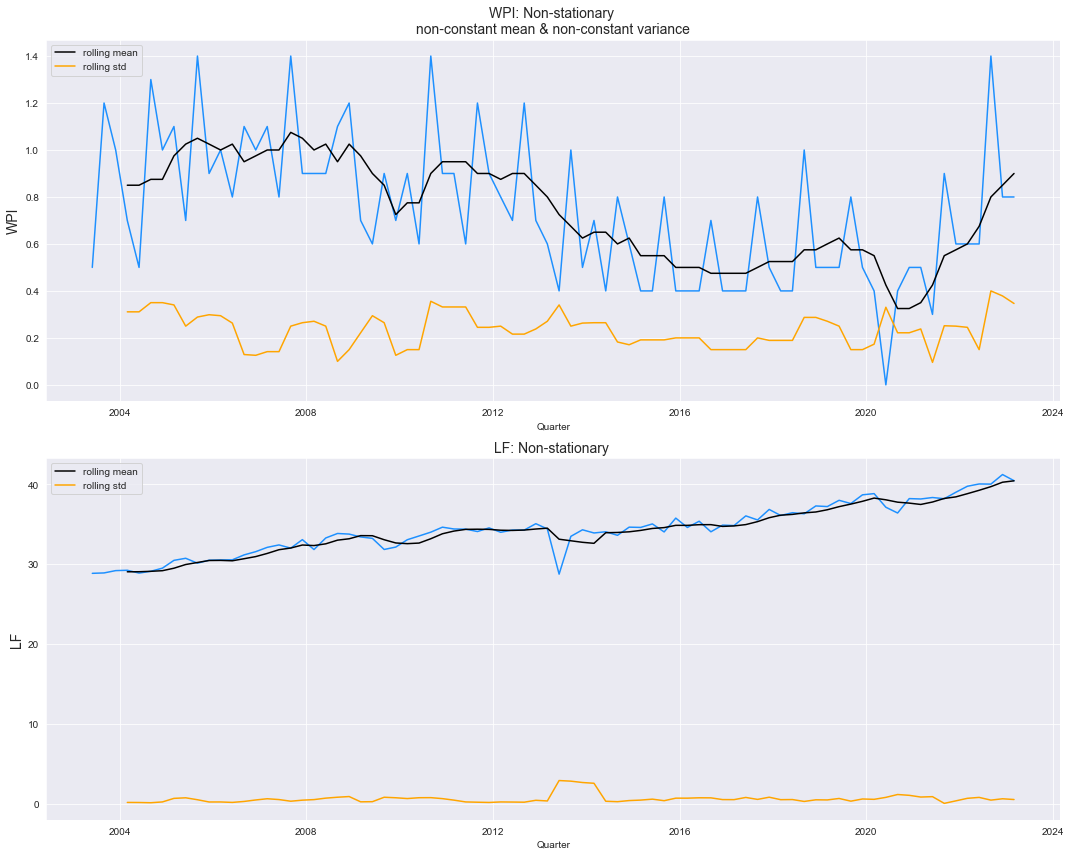

In [69]:
# Define the rolling window size. $ is for four quarters in one year
rolling_window = 4

# Create subplots with two rows and one column
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for column1
sns.lineplot(x=final_df['Quarter'], y=final_df[column1], ax=ax[0], color='dodgerblue')
sns.lineplot(x=final_df['Quarter'], y=final_df[column1].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=final_df['Quarter'], y=final_df[column1].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('WPI: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='WPI', fontsize=14)

# Plot for column2
sns.lineplot(x=final_df['Quarter'], y=final_df[column2], ax=ax[1], color='dodgerblue')
sns.lineplot(x=final_df['Quarter'], y=final_df[column2].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=final_df['Quarter'], y=final_df[column2].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('LF: Non-stationary ', fontsize=14)
ax[1].set_ylabel(ylabel='LF', fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


ADF test to check if the time series is stationary

In [62]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(final_df[column1].values)
result

(-1.174966634154781,
 0.6842706851602527,
 11,
 68,
 {'1%': -3.530398990560757,
  '5%': -2.9050874099328317,
  '10%': -2.5900010121107266},
 -29.533914603665664)

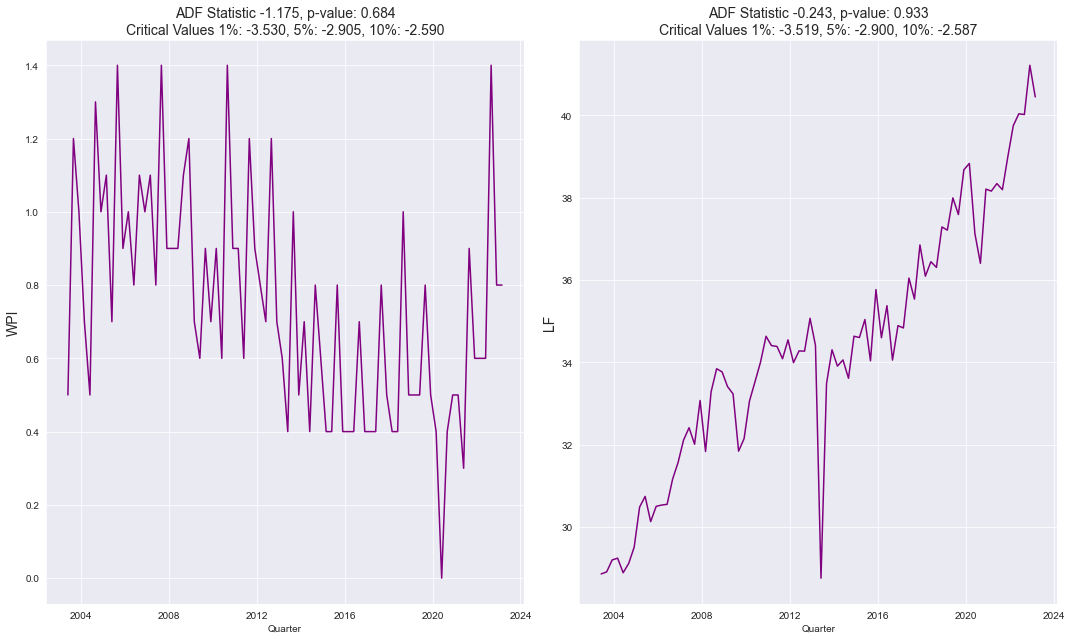

In [63]:
# Create subplots with one row and two columns
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))

# Function to visualize ADF test results
def visualize_adfuller_results(series, title, ax):
    # Perform ADF test on the series
    result = adfuller(series)

    # Set significance level and retrieve ADF statistic, p-value, and critical values
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    # Determine line color based on ADF test results
    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'

    # Plot the series with the determined line color
    sns.lineplot(x=final_df['Quarter'], y=series, ax=ax, color=linecolor)

    # Set the title and y-label for the subplot
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

# Visualize ADF test results for column1 in the first subplot
visualize_adfuller_results(final_df[column1].values, 'WPI', ax[0])

# Visualize ADF test results for column2 in the second subplot
visualize_adfuller_results(final_df[column2].values, 'LF', ax[1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


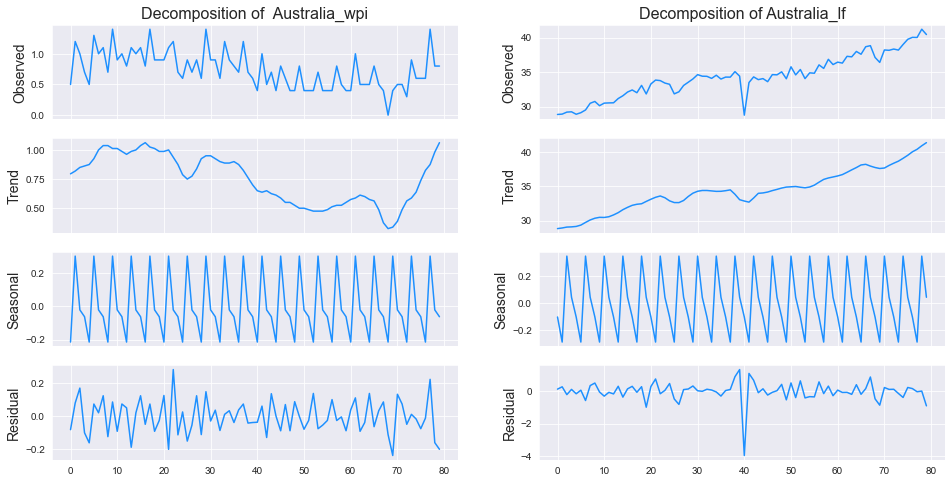

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate([' Australia_wpi', 'Australia_lf']):

    res = seasonal_decompose(final_df[column], period=4, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

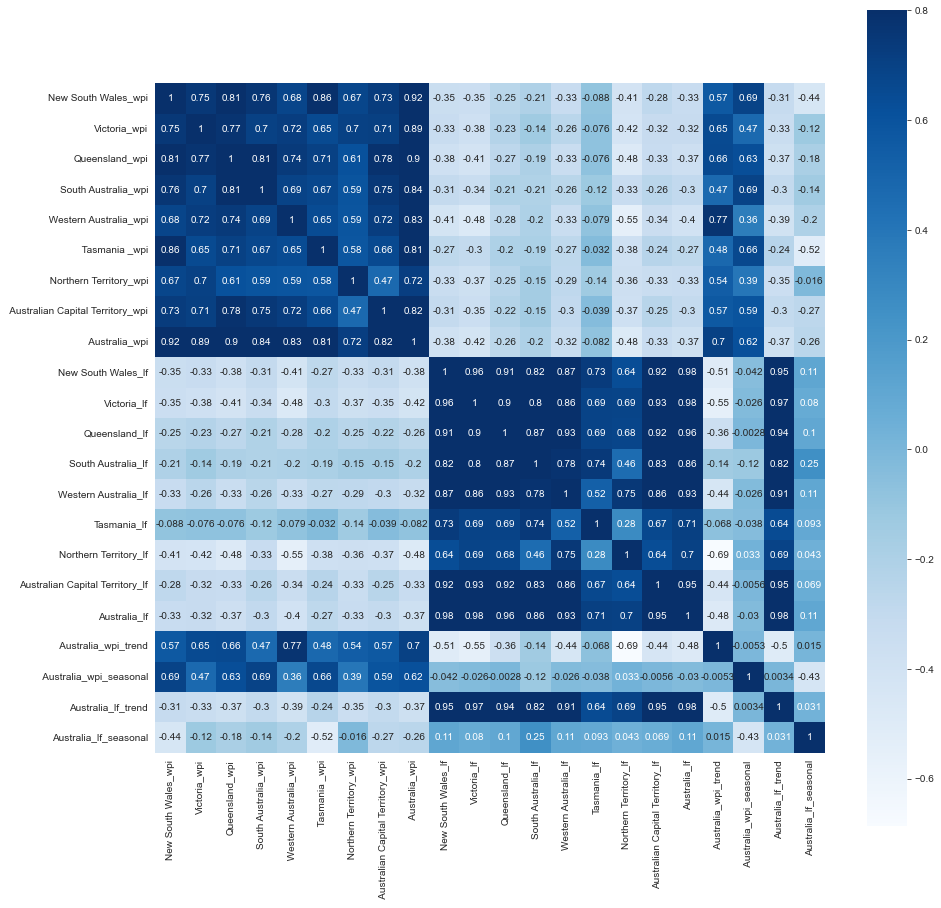

In [67]:
#Correlation matrix
cor = final_df.corr()
fig = plt.figure(figsize = (15,15))

sns.heatmap(cor, vmax = .8, square = True,cmap=plt.cm.Blues,annot=True)
plt.show()

Comparing the two series to check if they are related

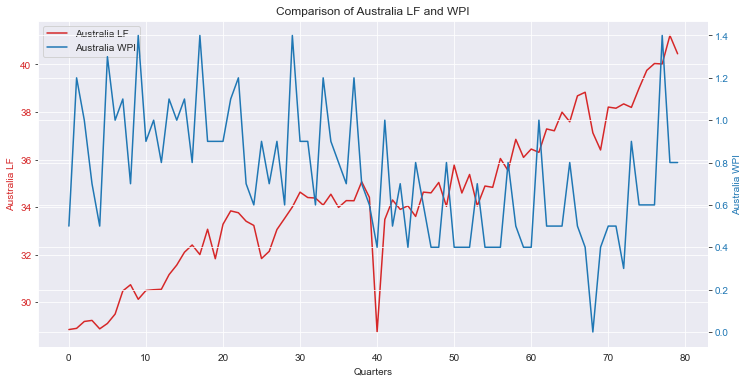

In [70]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot australia_lf on the first y-axis
color1 = 'tab:red'
ax1.plot(final_df.index, final_df['Australia_lf'], color=color1, label='Australia LF')
ax1.set_xlabel('Quarters')
ax1.set_ylabel('Australia LF', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis for australia_wpi
ax2 = ax1.twinx()

# Plot australia_wpi on the second y-axis
color2 = 'tab:blue'
ax2.plot(final_df.index, final_df[' Australia_wpi'], color=color2, label='Australia WPI')
ax2.set_ylabel('Australia WPI', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Set the title
ax1.set_title('Comparison of Australia LF and WPI')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()